<a href="https://colab.research.google.com/github/kkhtet/DSL_HOMEWORK/blob/main/Quiz2_Verilog(1003437_Kaung_Khant_Htet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Quiz 2



1. Useful commands: %%verilog, %%waveform, in Google Colab (a similar platform where you perform your homework).
2. Write Verilog source files (module and testbench), as per the description of the decade_counter as listed below, using if-else statements.
3. Submit ipynb (with Verilog HDL module and testbench) for assessment; (this file must be able to be run in Google Colab).
4. The specifications of the decade_counter are:
  - When "rst" is low, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is high, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 5'b10011, after which the count will count down to 5'b0, then count up and repeat the counting cycle.
  - Only when the count is 5'b10011, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.
5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 2 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 0 to 5'b10011 to 0;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - You are free to propose other test to verify the funcationality of the module;
Attach FileNo file chosen


# Decade Counter (Basic)

In [41]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [4:0] count,
    output reg ten
);

always @(posedge clk or negedge rst) begin
    if (!rst) begin
        count <= 5'b00000; // Reset count to 0
        ten <= 1'b0;       // Reset ten to 0
    end else
        begin
        if (count == 5'b10010) begin
            count <= 5'b00000; // Reset count to 0 after reaching 19
            ten <= 1'b1;       // Set ten to 1 when count is 19
        end else begin
            count <= count + 1'b1; // Increment count
            ten <= 1'b0;           // Keep ten at 0 during counting
        end
    end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [4:0] count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Clock generation: Period = 2 units
always begin
    #1 clk = ~clk;
end

initial begin
    // Initialize signals
    clk = 0;
    rst = 0;

    // Apply reset
    #2 rst = 1;      // Release reset at time=2

    // Monitor with both binary and decimal count
    $monitor("Time=%0d | rst=%b | count=%b (dec=%0d) | ten=%b",$time, rst, count, count, ten);
    $dumpfile("tb.vcd");
    $dumpvars();

    // RESET TEST
    // Run until time 47 then apply reset
    #47 rst = 0;     // Apply reset at time = 47
    #4  rst = 1;     // Release reset after a short pulse

    // Run a few more cycles to observe behavior
    #10;

    $finish;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.
Time=2 | rst=1 | count=00000 (dec=0) | ten=0
Time=3 | rst=1 | count=00001 (dec=1) | ten=0
Time=5 | rst=1 | count=00010 (dec=2) | ten=0
Time=7 | rst=1 | count=00011 (dec=3) | ten=0
Time=9 | rst=1 | count=00100 (dec=4) | ten=0
Time=11 | rst=1 | count=00101 (dec=5) | ten=0
Time=13 | rst=1 | count=00110 (dec=6) | ten=0
Time=15 | rst=1 | count=00111 (dec=7) | ten=0
Time=17 | rst=1 | count=01000 (dec=8) | ten=0
Time=19 | rst=1 | count=01001 (dec=9) | ten=0
Time=21 | rst=1 | count=01010 (dec=10) | ten=0
Time=23 | rst=1 | count=01011 (dec=11) | ten=0
Time=25 | rst=1 | count=01100 (dec=12) | ten=0
Time=27 | rst=1 | count=01101 (dec=13) | ten=0
Time=29 | rst=1 | count=01110 (dec=14) | ten=0
Time=31 | rst=1 | count=01111 (dec=15) | ten=0
Time=33 | rst=1 | count=10000 (dec=16) | ten=0
Time=35 | rst=1 | count=10001 (dec=17) | ten=0
Time=37 | rst=1 | count=10010 (dec=18) | ten=0
Time=39 | rst=1 | count=00000 (dec=0) | ten=1
Time=41 | rst=1 | count=00001 (

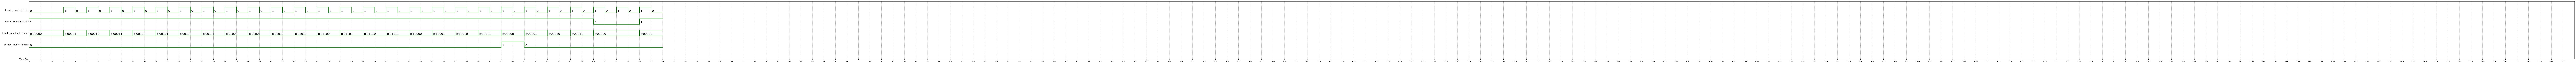

In [6]:
%%waveform tb.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 220
base = 'bin' # bin, dec, dec2, hex, octal


# Decade Counter (Count Up and Down)

This version features the decade counter to be able to count up or down

In [72]:
%%verilog

module decade_counter #(
    parameter WIDTH = 5,
    parameter MAX_COUNT = 5'b10010  // Decimal 18
)(
    input clk,
    input rst,
    output reg [WIDTH-1:0] count,
    output reg ten
);

always @(posedge clk or negedge rst) begin
    if (!rst) begin
        count <= 0;
        ten <= 0;
    end else begin
        if (count == MAX_COUNT + 1) begin // If count == 19, set ten and reset
            count <= 0;
            ten <= 1;
        end else begin
            count <= count + 1;
            ten <= 0;
        end
    end
end

endmodule

// DO NOT EDIT MODULE NAME AND PORT NAME!
%%verilog

module decade_counter_tb();

reg clk;
reg rst;
wire [4:0] count;
wire ten;

decade_counter dut (
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Clock generation (Period = 2 units)
always #1 clk = ~clk;

initial begin
    clk = 0;
    rst = 0;

    $monitor("Time=%0d | rst=%b | count=%b (dec=%0d) | ten=%b",
              $time, rst, count, count, ten);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Reset
    #2 rst = 1;

    repeat (200) begin
        #2;
        if (count == 5'd19) begin
            if (ten == 1)
                $display("✅ PASS: count = %0d and ten = %b at time %0d", count, ten, $time);
            else
                $display("❌ FAIL: count = %0d but ten = %b (Expected ten=1) at time %0d", count, ten, $time);
        end
    end

    $finish;
end

endmodule


The process occurred error, see below the error:

code.v:30: syntax error
I give up.

VCD info: dumpfile tb.vcd opened for output.
Time=0 | rst=0 | count=00000 (dec=0) | ten=0
Time=2 | rst=1 | count=00000 (dec=0) | ten=0
Time=3 | rst=1 | count=00001 (dec=1) | ten=0
Time=5 | rst=1 | count=00010 (dec=2) | ten=0
Time=7 | rst=1 | count=00011 (dec=3) | ten=0
Time=9 | rst=1 | count=00100 (dec=4) | ten=0
Time=11 | rst=1 | count=00101 (dec=5) | ten=0
Time=13 | rst=1 | count=00110 (dec=6) | ten=0
Time=15 | rst=1 | count=00111 (dec=7) | ten=0
Time=17 | rst=1 | count=01000 (dec=8) | ten=0
Time=19 | rst=1 | count=01001 (dec=9) | ten=0
Time=21 | rst=1 | count=01010 (dec=10) | ten=0
Time=23 | rst=1 | count=01011 (dec=11) | ten=0
Time=25 | rst=1 | count=01100 (dec=12) | ten=0
Time=27 | rst=1 | count=01101 (dec=13) | ten=0
Time=29 | rst=1 | count=01110 (dec=14) | ten=0
Time=31 | rst=1 | count=01111 (dec=15) | ten=0
Time=33 | rst=1 | count=10000 (dec=16) | ten=0
Time=35 | rst=1 | count=10001 (dec=17) |

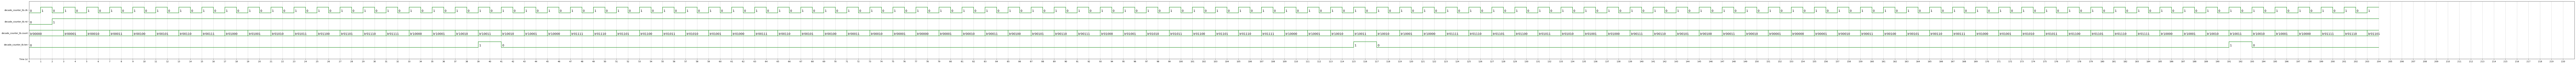

In [58]:
%%waveform tb.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 220
base = 'bin' # bin, dec, dec2, hex, octal

# Decade Counter (Intermediate)


In [74]:
%%verilog

module decade_counter #(
    parameter WIDTH = 5,
    parameter MAX_COUNT = 5'd18   // Decimal 18
)(
    input clk,
    input rst,
    output reg [WIDTH-1:0] count,
    output reg ten
);

reg [WIDTH-1:0] next_count;

always @(posedge clk or negedge rst) begin
    if (!rst) begin
        count <= 0;
        ten <= 0;
    end else begin
        // Calculate next count
        if (count == MAX_COUNT + 1) begin
            next_count = 0;
        end else begin
            next_count = count + 1;
        end

        // Update count
        count <= next_count;

        // ten is asserted based on next_count reaching 19
        if (next_count == 5'd19)
            ten <= 1;
        else
            ten <= 0;
    end
end

endmodule


// DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [4:0] count;
wire ten;

parameter MAX_COUNT = 5'd18;

decade_counter #(.WIDTH(5), .MAX_COUNT(MAX_COUNT)) dut (
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Clock generation
always #1 clk = ~clk;

// Behavioral testbench with self-checking loop and randomization
integer cycle;
integer random_loops;

initial begin
    clk = 0;
    rst = 0;
    $monitor("Time=%0d | rst=%b | count=%b (dec=%0d) | ten=%b",
              $time, rst, count, count, ten);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Apply reset
    #2 rst = 1;

    // Randomize how many test cycles we run for wider coverage
    random_loops = $urandom_range(3, 5); // Random number of passes
    $display("Running %0d full cycles for wide coverage", random_loops);

    for (cycle = 0; cycle < random_loops; cycle = cycle + 1) begin
        wait(count == 5'd19);  // Wait until count hits 19
        if (ten == 1) begin
            $display("✅ PASS Cycle %0d: count=19, ten=1 at time %0d", cycle+1, $time);
        end else begin
            $display("❌ FAIL Cycle %0d: count=19, ten=%b (Expected 1) at time %0d", cycle+1, ten, $time);
        end
        // Wait for counter to roll back to 0 before next cycle
        wait(count == 0);
    end

    $display("✅ Test Completed Successfully");
    $finish;
end

endmodule

VCD info: dumpfile tb.vcd opened for output.
Time=0 | rst=0 | count=00000 (dec=0) | ten=0
Running 4 full cycles for wide coverage
Time=2 | rst=1 | count=00000 (dec=0) | ten=0
Time=3 | rst=1 | count=00001 (dec=1) | ten=0
Time=5 | rst=1 | count=00010 (dec=2) | ten=0
Time=7 | rst=1 | count=00011 (dec=3) | ten=0
Time=9 | rst=1 | count=00100 (dec=4) | ten=0
Time=11 | rst=1 | count=00101 (dec=5) | ten=0
Time=13 | rst=1 | count=00110 (dec=6) | ten=0
Time=15 | rst=1 | count=00111 (dec=7) | ten=0
Time=17 | rst=1 | count=01000 (dec=8) | ten=0
Time=19 | rst=1 | count=01001 (dec=9) | ten=0
Time=21 | rst=1 | count=01010 (dec=10) | ten=0
Time=23 | rst=1 | count=01011 (dec=11) | ten=0
Time=25 | rst=1 | count=01100 (dec=12) | ten=0
Time=27 | rst=1 | count=01101 (dec=13) | ten=0
Time=29 | rst=1 | count=01110 (dec=14) | ten=0
Time=31 | rst=1 | count=01111 (dec=15) | ten=0
Time=33 | rst=1 | count=10000 (dec=16) | ten=0
Time=35 | rst=1 | count=10001 (dec=17) | ten=0
Time=37 | rst=1 | count=10010 (dec=18) 

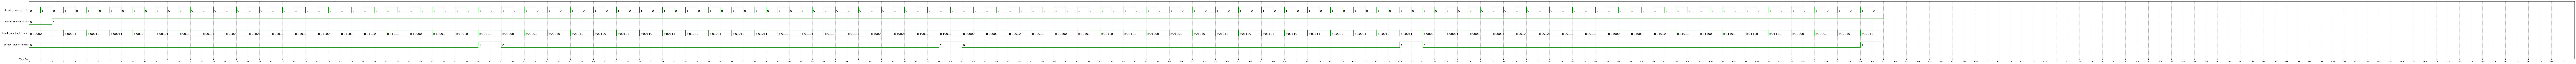

In [76]:
%%waveform tb.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst', 'decade_counter_tb.count', 'decade_counter_tb.ten']
time_begin = 0
time_end = 220
base = 'bin' # bin, dec, dec2, hex, octal


# Decade Counter (Advanced)

In [70]:
%%verilog

module decade_counter (
    input clk,
    input rst,
    input dir,                   // 0: count up, 1: count down
    input [4:0] target,          // target value for upper limit
    output reg [4:0] count,
    output reg ten
);

    always @(posedge clk or negedge rst) begin
        if (!rst) begin
            count <= 5'b00000;
            ten <= 1'b0;
        end else begin
            if (dir == 0) begin
                if (count == target) begin
                    ten <= 1'b1;       // Set ten if target is reached
                    count <= count - 1; // Auto-switch to counting down
                end else begin
                    count <= count + 1;
                    ten <= 1'b0;
                end
            end else begin  // dir == 1, count down
                if (count == 0) begin
                    ten <= 1'b0;
                    count <= count + 1; // Switch back to counting up
                end else begin
                    count <= count - 1;
                    ten <= 1'b0;
                end
            end
        end
    end

endmodule

module decade_counter_tb();

reg clk;
reg rst;
reg dir;
reg [4:0] target;
wire [4:0] count;
wire ten;

decade_counter dut (
    .clk(clk),
    .rst(rst),
    .dir(dir),
    .target(target),
    .count(count),
    .ten(ten)
);

// Clock generation (Period = 2 units)
always #1 clk = ~clk;

initial begin
    clk = 0;
    rst = 0;
    dir = 0;
    target = 5'b10010; // Target set to 18 decimal

    $monitor("Time=%0d | rst=%b | dir=%b | count=%b (dec=%0d) | ten=%b",
              $time, rst, dir, count, count, ten);
    $dumpfile("tb.vcd");
    $dumpvars();

    // Reset the system
    #2 rst = 1;

    // Run one full cycle: up to target and down to zero
    while (count != target) begin
        #2;
    end

    #2 dir = 1; // After reaching target, start counting down

    while (count != 5'b00000) begin
        #2;
    end

    // Optional: Start counting up again
    #2 dir = 0;

    #50;  // Run some more to observe

    $finish;
end

endmodule

VCD info: dumpfile tb.vcd opened for output.
Time=0 | rst=0 | dir=0 | count=00000 (dec=0) | ten=0
Time=2 | rst=1 | dir=0 | count=00000 (dec=0) | ten=0
Time=3 | rst=1 | dir=0 | count=00001 (dec=1) | ten=0
Time=5 | rst=1 | dir=0 | count=00010 (dec=2) | ten=0
Time=7 | rst=1 | dir=0 | count=00011 (dec=3) | ten=0
Time=9 | rst=1 | dir=0 | count=00100 (dec=4) | ten=0
Time=11 | rst=1 | dir=0 | count=00101 (dec=5) | ten=0
Time=13 | rst=1 | dir=0 | count=00110 (dec=6) | ten=0
Time=15 | rst=1 | dir=0 | count=00111 (dec=7) | ten=0
Time=17 | rst=1 | dir=0 | count=01000 (dec=8) | ten=0
Time=19 | rst=1 | dir=0 | count=01001 (dec=9) | ten=0
Time=21 | rst=1 | dir=0 | count=01010 (dec=10) | ten=0
Time=23 | rst=1 | dir=0 | count=01011 (dec=11) | ten=0
Time=25 | rst=1 | dir=0 | count=01100 (dec=12) | ten=0
Time=27 | rst=1 | dir=0 | count=01101 (dec=13) | ten=0
Time=29 | rst=1 | dir=0 | count=01110 (dec=14) | ten=0
Time=31 | rst=1 | dir=0 | count=01111 (dec=15) | ten=0
Time=33 | rst=1 | dir=0 | count=10000